# Part 1: Introducing MNIST

In [1]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

## The MNIST Dataset

MNIST is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centred. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard spit of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. There is a listing of the state-of-the-art results and links to the relevant papers on the MNIST and other datasets on [Rodrigo Benenson’s webpage](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354).

## Loading the MNIST dataset in PyTorch and torchvision

The `torchvision` library provides a convenience method for loading the MNIST dataset. The dataset can be downloaded automatically the first time this function is called and is stored in a location of your choice. This is very handy for developing and testing deep learning models.

To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset. __Read through the following code and then go-ahead and run it__.

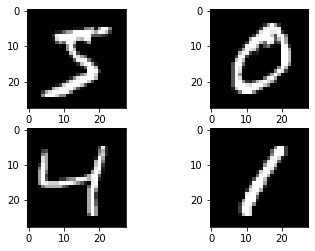

In [4]:
%matplotlib inline

# Plot ad hoc mnist instances
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# load (download if needed) the MNIST dataset
mnist_train = MNIST(".", train=True, download=True)

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(mnist_train.train_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(mnist_train.train_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(mnist_train.train_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(mnist_train.train_data[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

You can see that downloading and loading the MNIST dataset is as easy as constructing an `MNIST` object. The `MNIST` object is a subclass of a PyTorch [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class, which as we'll see later can be used with a `DataLoader` object to provide streaming access to batches of data. The `MNIST` object loads all of the data in memory because it is so small; other datasets will load the data from disk (or elsewhere) on demand.

__Use the following code block to explore the `mnist_train` object, then answer the questions that follow.__

In [7]:
print(mnist_train.train_data)
print(mnist_train.train_data.size())
print(mnist_train.train_data[59999])

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

__Answer the following questions (enter the answer in the box below each one):__

__1.__ What type of object is the `mnist_train.train_data`?

Tensor object

__2.__ What is the shape of `mnist_train.train_data`?`

60000 * 28 * 28

__3.__ How is the label of each image stored in `mnist_train`?

Integers from {0,1,2,3,4,5,6,7,8,9}

# Part 2: Implementing an MLP classifier

In [9]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

## Getting Started with a Baseline Multi-Layer Perceptron Model

In addition to being a defacto tensor processing and automatic differentiation library, PyTorch provides a general purpose neural network toolbox. Before we start to look at deep convolutional architectures, we can start with something much simpler - a basic multilayer perceptron. Because the MNIST images are relatively small, a fully connected MLP network will have relatively few weights to train; with bigger images, an MLP might not be practical due to the number of weights.

In this section we will create a simple multi-layer perceptron model with a single hidden layer that achieves an error rate of 1.88%. We will use this as a baseline for comparing more complex convolutional neural network models later.

Let's start off by importing the classes and functions we will need.

In [10]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

When developing, it is always a good idea to initialize the random number generator to a constant to ensure that the results of your script are reproducible each time you run it. Once the model is implemented and tested we might remove this to enable variance to be captured over multiple training runs.

In [11]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

## Loading the MNIST data

For the MLP network that we'll shortly define, we need to define a transformation to the data provided by the `MNIST` object that flattens each images into a vector. Before that happens, our transformation must also convert each image from a PIL image to a PyTorch `Tensor`. We can use the classes provided by the `torchvision.transforms` package to compose a set of transforms that given a PIL image will convert the input image to a `Tensor` and reshape that tensor into a vector:

In [17]:
# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

Note that for the latter part of the transform we use `Lambda` which allows us to construct a custom transform (rather than use one provided by torchvision). In this case our lambda function returns a new view of the input tensor which is a vector of length equal to the product of the input tensor's dimensions. In this particular case the input tensor had shape `[28, 28]`, so the output will have shape `[784]`. Passing `-1` as the input to the `view` method makes it automatically compute the output shape on the basis of the input.

Now we can load the training and test splits of the MNIST dataset using the torchvision `MNIST` utility class. We can also provide our `transform` object so that it will be applied automatically when the data loads.

In [13]:
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

When we train and evaluate our model, we will require batches of data to be provided. As previously mentioned, the `DataLoader` class can automatically provide batches fetched from a `Dataset` object. The `DataLoader` has the ability to fetch batches in the background (using multiple threads if required) to optimise throughput to the deep network model. It also supports shuffling of the data order (very useful for gradient-based learning!).

In [14]:
# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

DataLoaders are iterable and can be used within a loop to fetch batches of data. Each batch is a tuple containing the images in the first element and the labels in the second. __Complete the following code block to calculate the number of instances of each class by iterating over the training data__:

In [42]:
class_counts = torch.zeros(10, dtype=torch.int32)
print(class_counts)
for (images,labels) in trainloader:
    for i in range(labels.size()[0]):
#         print(i)
#         print(labels[i])
        for j in range(10):
            if labels[i] == j:
                class_counts[j] += 1

print(class_counts)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=torch.int32)


In [43]:
assert class_counts.sum()==60000

__Answer the following questions (enter the answer in the box below each one):__

__1.__ Do all of the batches have the same size?

468 * 128 + 1 * 96

__2.__ How can we configure `DataLoader` to control this?

YOUR ANSWER HERE

## Defining the MLP Model

We are now ready to create our simple neural network model. We will define our model in a class that extends `nn.Module`. `nn.Module` subclasses must do a minimum of one thing: implement the `forward` method which takes a batch of data and performs the forward-pass. PyTorch's autograd system will take care of computing the gradients of the forward pass for us. In the code below we'll also make use of the constructor of our model to instantiate the hidden and output layers.

In [47]:
# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = torch.nn.functional.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = torch.nn.functional.softmax(out, dim=1)
        return out

The model is a simple neural network with one hidden layer. A rectifier linear unit (ReLU) activation function is used for the neurons in the hidden layer. Note how we use the PyTorch 'Functional API' for stateless operations like applying the ReLU; we could construct a `torch.nn.ReLU` in the constructor and save it in an instance variable instead, but ultimately this would lead to more lines of code.

The `nn.Module` class defines a instance variable called `training` that is set to `True` when the model is being trained and `False` when it is being evaluated after being trained. In our model definition we've used a softmax activation function on the output layer to turn the outputs into probability-like values, but have only set this to be enabled when we are not training the model. We've done this because we will use PyTorch's implementation of Cross Entropy Loss (`nn.CrossEntropyLoss`) during training which implicitly adds a softmax before a logarithmic loss (technically it adds a log-softmax activation followed by a negative log-likelihood loss as this has much better numerical properties). If you've used a library like Keras before you should note that this approach is different to the one taken there - Keras expects you to explicitly add a `Softmax` layer to use with its `categorical_crossentropy` loss.

In our case the softmax isn't actually necessary for model evaluation if we're only interested in the most likely class; the _logits_ (unscaled log probabilities) provided by the final fully connected layer before the softmax can be used directly as the largest logit will correspond to the most likely class.

## Training and Evaluating the Model
We can now fit and evaluate the model. One of the design decisions of PyTorch is that everything should be explicit so we have full control over our models and the training process. This means that we actually need to write the model training loop by hand, and perform each of the various operations (perform the forward-pass, compute the loss, perform the backward-pass, and update the weights). In the code below we'll fit the model to the data over 10 epochs using batches of 128 images provided by the `DataLoader` defined previously. We'll make use of the ADAM optimiser as it broadly tends to work well practically despite its limitations. Running the code below should take just a couple of minutes to complete the training.

In [45]:
# build the model 
model = BaselineModel(784, 784, 10)

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(10):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

Epoch 0, loss 136.85
Epoch 1, loss 53.27
Epoch 2, loss 34.41
Epoch 3, loss 24.25
Epoch 4, loss 17.19
Epoch 5, loss 13.10
Epoch 6, loss 9.59
Epoch 7, loss 6.89
Epoch 8, loss 6.16
Epoch 9, loss 4.60
**** Finished Training ****


In the above we added a crude indicator of progress by printing the total loss at the end of each epoch. Hopefully the loss went down as the model learned! 

At this point it would be good to compute the overall accuracy of the test set. __Use the following code block to finish implementation of the accuracy computation.__ Note that before the code you'll implement we've made a call to `model.eval()` - this sets the model into evaluation mode and supresses non-training things (gradients, and things such as dropout being applied/computed).

In [76]:
model.eval()
correct = 0
total = 0
for data in testloader:
    # get the inputs
    inputs, labels = data
    outputs = model(inputs)
    pred = outputs.argmax(1)
    test_correct = ((pred == labels.squeeze(-1)).sum()).int()
#     print(inputs)
#     print(outputs)
    print(pred)
    print(labels)
#     print(test_correct)
#     print(labels.size()[0])
    correct += test_correct
    total += labels.size()[0]
#     print((100.0 * correct) / total)

# Compute the model accuracy on the test set



# YOUR CODE HERE
# raise NotImplementedError()

print('Test Accuracy: %2.2f %%' % ((100.0 * correct) / total))

tensor([0, 9, 1, 6, 3, 9, 2, 8, 6, 9, 3, 6, 2, 3, 2, 2, 8, 1, 8, 7, 2, 6, 8, 5,
        9, 7, 0, 4, 4, 8, 7, 2, 8, 1, 2, 9, 1, 4, 1, 6, 0, 7, 9, 9, 4, 4, 3, 6,
        4, 9, 6, 7, 0, 1, 3, 4, 4, 3, 6, 3, 8, 3, 7, 0, 3, 0, 1, 9, 2, 1, 0, 9,
        3, 8, 3, 7, 1, 5, 1, 0, 4, 1, 0, 0, 9, 0, 1, 0, 4, 8, 4, 5, 5, 1, 7, 8,
        7, 6, 4, 4, 2, 2, 8, 6, 7, 9, 6, 4, 1, 6, 2, 7, 5, 1, 6, 3, 2, 9, 0, 4,
        1, 1, 2, 0, 3, 3, 2, 8])
tensor([0, 9, 1, 6, 3, 9, 2, 8, 6, 9, 3, 6, 6, 3, 2, 7, 8, 1, 8, 7, 2, 6, 8, 5,
        9, 7, 0, 4, 4, 8, 7, 2, 8, 1, 2, 9, 1, 4, 1, 6, 0, 7, 9, 9, 4, 4, 3, 6,
        4, 9, 6, 7, 0, 1, 3, 4, 4, 3, 6, 3, 8, 3, 7, 0, 3, 0, 1, 9, 2, 1, 0, 9,
        3, 8, 3, 7, 1, 5, 1, 0, 4, 1, 0, 0, 9, 0, 1, 0, 4, 8, 4, 5, 5, 1, 7, 8,
        7, 6, 4, 4, 2, 2, 8, 6, 7, 3, 6, 4, 1, 6, 2, 7, 5, 1, 6, 3, 2, 9, 0, 4,
        1, 1, 2, 0, 3, 3, 2, 8])
tensor([7, 1, 2, 0, 0, 2, 9, 4, 0, 9, 7, 0, 4, 4, 9, 0, 2, 6, 4, 6, 3, 1, 7, 7,
        3, 1, 6, 1, 2, 4, 9, 4, 5, 0, 0, 5, 5, 4, 9, 3

tensor([5, 0, 4, 9, 7, 2, 8, 1, 2, 4, 3, 2, 1, 3, 4, 8, 3, 3, 6, 0, 7, 0, 6, 1,
        1, 7, 4, 9, 9, 0, 0, 0, 4, 3, 1, 7, 1, 4, 7, 7, 1, 3, 5, 2, 5, 8, 8, 7,
        1, 1, 2, 9, 3, 8, 3, 8, 8, 5, 1, 9, 3, 7, 6, 7, 1, 1, 8, 4, 7, 8, 0, 3,
        6, 1, 7, 7, 4, 9, 5, 4, 7, 5, 3, 5, 8, 1, 1, 9, 3, 8, 0, 2, 0, 3, 4, 6,
        6, 4, 5, 3, 2, 3, 7, 6, 1, 4, 1, 2, 8, 9, 8, 1, 9, 0, 1, 9, 1, 5, 2, 6,
        5, 1, 0, 9, 7, 0, 5, 4])
tensor([5, 8, 6, 1, 2, 7, 9, 6, 8, 4, 7, 5, 7, 6, 3, 3, 1, 2, 9, 8, 8, 1, 5, 5,
        7, 2, 6, 3, 7, 8, 2, 9, 7, 3, 1, 6, 7, 9, 3, 4, 0, 5, 1, 5, 7, 2, 4, 1,
        7, 2, 0, 2, 8, 8, 2, 9, 5, 5, 4, 1, 2, 4, 5, 4, 1, 4, 1, 8, 1, 9, 0, 0,
        3, 9, 9, 0, 1, 8, 0, 7, 1, 3, 0, 0, 8, 6, 4, 0, 2, 6, 1, 8, 4, 7, 3, 6,
        9, 8, 7, 1, 2, 9, 7, 7, 6, 7, 3, 0, 9, 5, 8, 2, 0, 5, 0, 9, 8, 3, 1, 0,
        9, 9, 0, 3, 5, 3, 1, 5])
tensor([5, 8, 6, 1, 2, 7, 9, 6, 8, 4, 7, 5, 7, 6, 3, 3, 1, 2, 9, 8, 8, 1, 5, 5,
        7, 2, 6, 3, 7, 8, 2, 9, 7, 8, 1, 6, 7, 9, 3, 4

tensor([0, 3, 3, 4, 7, 3, 7, 4, 6, 1, 9, 0, 7, 5, 1, 6, 9, 0, 4, 9, 5, 4, 9, 3,
        9, 2, 3, 7, 4, 0, 4, 5, 7, 3, 5, 7, 5, 7, 5, 3, 6, 3, 0, 0, 7, 6, 0, 2,
        5, 6, 2, 4, 1, 6, 9, 3, 2, 3, 3, 2, 1, 8, 9, 9, 7, 5, 2, 5, 6, 4, 0, 8,
        4, 9, 3, 6, 4, 1, 4, 8, 1, 9, 6, 2, 2, 1, 8, 1, 9, 0, 2, 2, 3, 6, 0, 1,
        8, 6, 6, 4, 2, 0, 9, 0, 8, 6, 5, 6, 0, 6, 3, 8, 8, 5, 7, 1, 5, 2, 7, 2,
        2, 5, 2, 2, 7, 7, 1, 6])
tensor([1, 2, 9, 1, 6, 6, 0, 7, 7, 1, 3, 9, 5, 7, 6, 7, 9, 2, 1, 1, 8, 5, 5, 8,
        1, 5, 5, 9, 3, 0, 5, 8, 9, 4, 3, 5, 3, 7, 2, 3, 6, 8, 0, 4, 8, 2, 4, 8,
        9, 1, 9, 6, 1, 0, 3, 0, 3, 5, 9, 8, 0, 4, 8, 4, 0, 4, 6, 7, 4, 6, 6, 8,
        1, 5, 2, 4, 0, 8, 0, 5, 6, 3, 3, 4, 8, 9, 2, 1, 7, 7, 1, 2, 8, 9, 0, 2,
        9, 3, 1, 7, 4, 0, 7, 8, 2, 9, 9, 0, 6, 5, 5, 8, 5, 6, 2, 0, 5, 5, 6, 7,
        7, 2, 7, 4, 5, 4, 9, 0])
tensor([1, 2, 9, 1, 6, 6, 0, 7, 7, 1, 3, 9, 5, 7, 6, 7, 9, 2, 1, 1, 8, 5, 5, 8,
        1, 5, 5, 9, 3, 0, 5, 8, 4, 4, 3, 5, 3, 7, 2, 3

tensor([5, 1, 9, 9, 0, 2, 0, 1, 0, 4, 0, 7, 6, 4, 1, 4, 6, 3, 0, 5, 5, 8, 3, 5,
        6, 0, 6, 7, 9, 2, 7, 5, 8, 3, 5, 9, 2, 0, 4, 0, 7, 8, 6, 2, 3, 5, 5, 6,
        2, 4, 0, 9, 9, 7, 6, 6, 1, 2, 7, 4, 7, 9, 8, 4, 0, 2, 4, 3, 2, 2, 8, 1,
        0, 1, 5, 8, 7, 2, 9, 1, 5, 9, 2, 0, 2, 1, 2, 9, 0, 2, 0, 4, 0, 7, 2, 3,
        1, 5, 0, 6, 2, 6, 3, 9, 0, 4, 1, 9, 2, 9, 8, 8, 0, 3, 7, 0, 9, 1, 0, 9,
        7, 6, 8, 2, 4, 3, 5, 1])
tensor([1, 5, 3, 5, 6, 2, 3, 4, 7, 3, 1, 7, 1, 5, 4, 2, 9, 8, 0, 4, 6, 7, 3, 7,
        7, 1, 4, 5, 4, 2, 5, 0, 3, 6, 1, 8, 4, 2, 2, 8, 0, 8, 2, 3, 8, 8, 8, 1,
        7, 0, 9, 4, 9, 2, 6, 3, 0, 9, 5, 0, 6, 0, 7, 9, 1, 2, 2, 0, 9, 1, 2, 1,
        7, 4, 8, 4, 3, 7, 4, 5, 8, 0, 1, 9, 7, 6, 7, 7, 0, 9, 3, 3, 3, 7, 6, 7,
        3, 8, 8, 6, 1, 4, 4, 2, 7, 8, 2, 1, 3, 6, 9, 5, 8, 2, 0, 5, 3, 0, 3, 0,
        0, 6, 5, 6, 1, 4, 6, 1])
tensor([1, 5, 3, 5, 6, 2, 3, 4, 7, 3, 1, 7, 1, 5, 4, 2, 9, 8, 0, 4, 6, 7, 3, 7,
        7, 1, 4, 5, 4, 2, 5, 0, 3, 6, 1, 8, 4, 2, 2, 8

tensor([1, 4, 6, 7, 7, 0, 2, 6, 8, 8, 9, 2, 4, 3, 6, 4, 3, 7, 7, 5, 1, 6, 4, 3,
        4, 8, 1, 0, 2, 1, 3, 9, 2, 5, 7, 1, 7, 6, 4, 7, 7, 8, 6, 2, 4, 2, 2, 4,
        3, 9, 2, 2, 2, 1, 9, 3, 1, 1, 1, 8, 4, 8, 1, 7, 8, 3, 0, 8, 1, 5, 7, 0,
        0, 2, 6, 5, 2, 7, 7, 7, 9, 0, 2, 8, 6, 3, 0, 8, 1, 0, 6, 6, 7, 9, 9, 4,
        8, 0, 3, 5, 4, 8, 4, 3, 8, 8, 9, 7, 3, 5, 5, 9, 7, 8, 4, 9, 6, 1, 8, 2,
        2, 5, 1, 3, 2, 2, 3, 8])
tensor([1, 4, 6, 7, 7, 0, 2, 6, 8, 8, 9, 2, 4, 3, 6, 4, 3, 7, 7, 5, 1, 6, 4, 3,
        4, 8, 1, 0, 2, 1, 3, 9, 2, 5, 7, 1, 7, 6, 4, 7, 7, 8, 6, 2, 4, 2, 2, 4,
        3, 9, 2, 2, 2, 1, 9, 3, 1, 1, 1, 8, 4, 8, 1, 7, 8, 3, 0, 8, 1, 5, 7, 0,
        0, 2, 6, 5, 2, 7, 7, 7, 9, 0, 2, 8, 6, 3, 0, 8, 1, 0, 6, 6, 7, 9, 9, 4,
        8, 0, 3, 5, 4, 8, 4, 3, 8, 8, 9, 7, 3, 5, 5, 9, 7, 8, 4, 9, 6, 1, 8, 2,
        2, 5, 1, 3, 2, 2, 3, 8])
tensor([7, 9, 7, 3, 6, 7, 8, 9, 6, 3, 7, 1, 1, 5, 0, 4, 7, 2, 2, 5, 5, 5, 7, 7,
        7, 4, 2, 5, 4, 7, 3, 1, 0, 9, 1, 1, 8, 2, 2, 8

tensor([0, 8, 9, 0, 0, 4, 9, 5, 7, 0, 2, 2, 8, 3, 4, 2, 0, 2, 6, 2, 4, 4, 3, 5,
        7, 9, 5, 7, 3, 4, 9, 9, 9, 8, 3, 6, 8, 7, 1, 5, 3, 3, 3, 2, 8, 7, 8, 6,
        7, 1, 1, 0, 3, 4, 0, 3, 2, 0, 4, 0, 8, 8, 0, 0, 6, 4, 0, 3, 8, 7, 5, 6,
        1, 6, 1, 8, 8, 7, 8, 4, 9, 6, 4, 5, 3, 1, 2, 8, 2, 4, 3, 7, 9, 5, 2, 0,
        3, 9, 5, 7, 9, 5, 1, 1, 9, 8, 0, 6, 8, 8, 0, 4, 5, 4, 3, 1, 1, 0, 2, 8,
        8, 9, 7, 6, 0, 6, 2, 5])
tensor([5, 0, 6, 2, 7, 1, 3, 8, 4, 0, 3, 9, 4, 9, 6, 5, 8, 6, 4, 7, 0, 3, 6, 9,
        6, 2, 0, 0, 2, 7, 4, 6, 8, 6, 6, 9, 4, 4, 6, 9, 9, 2, 7, 1, 8, 1, 6, 3,
        2, 3, 2, 9, 6, 9, 3, 0, 7, 8, 9, 9, 5, 5, 7, 2, 6, 3, 4, 0, 5, 4, 6, 4,
        4, 7, 1, 1, 7, 9, 2, 0, 4, 1, 4, 1, 5, 8, 8, 5, 0, 5, 4, 5, 7, 2, 4, 7,
        6, 1, 6, 0, 9, 5, 2, 8, 3, 0, 8, 9, 1, 8, 5, 9, 3, 3, 7, 3, 5, 6, 7, 2,
        5, 0, 6, 5, 0, 9, 4, 2])
tensor([5, 0, 6, 2, 7, 1, 3, 8, 4, 0, 3, 9, 4, 9, 6, 5, 8, 6, 4, 7, 0, 3, 6, 9,
        6, 2, 0, 0, 2, 7, 4, 6, 8, 6, 6, 9, 4, 4, 6, 9

tensor([7, 4, 0, 8, 1, 6, 1, 8, 1, 9, 6, 6, 2, 4, 5, 0, 4, 0, 1, 1, 8, 3, 2, 1,
        7, 9, 7, 7, 4, 1, 5, 0, 8, 5, 2, 2, 0, 4, 7, 9, 4, 4, 3, 5, 8, 5, 4, 6,
        5, 0, 3, 3, 8, 0, 1, 7, 0, 8, 0, 6, 7, 7, 5, 9, 3, 6, 8, 2, 1, 0, 1, 4,
        3, 2, 3, 3, 9, 9, 3, 8, 8, 0, 8, 5, 2, 7, 7, 2, 3, 1, 7, 0, 6, 1, 3, 0,
        0, 4, 2, 2, 8, 8, 2, 4, 4, 1, 0, 1, 0, 7, 7, 9, 3, 7, 2, 2, 3, 2, 5, 3,
        1, 1, 2, 9, 3, 1, 7, 0])
tensor([7, 6, 3, 9, 0, 8, 5, 0, 6, 7, 9, 7, 3, 2, 6, 0, 7, 4, 9, 2, 0, 8, 1, 0,
        2, 0, 4, 3, 9, 0, 6, 3, 2, 3, 6, 7, 3, 2, 8, 1, 2, 4, 3, 8, 6, 0, 4, 6,
        5, 4, 9, 3, 1, 9, 4, 7, 8, 5, 4, 7, 1, 3, 2, 5, 4, 2, 3, 2, 2, 2, 6, 4,
        6, 8, 9, 9, 1, 4, 2, 7, 0, 6, 1, 9, 8, 6, 3, 6, 6, 4, 7, 4, 2, 6, 8, 8,
        4, 8, 3, 1, 2, 4, 2, 4, 8, 6, 7, 4, 6, 6, 9, 0, 7, 2, 0, 1, 7, 5, 7, 5,
        3, 1, 7, 9, 3, 6, 5, 6])
tensor([7, 6, 3, 9, 0, 8, 5, 0, 6, 7, 9, 7, 3, 2, 6, 0, 7, 4, 9, 2, 0, 8, 1, 0,
        2, 0, 4, 4, 9, 0, 1, 3, 2, 5, 6, 7, 3, 2, 8, 1

__In multi-class classification tasks it is often instructive to explore the accuracy of each class. Use the code block below to complete the function that produces the per-class accuracy:__

In [72]:
# Compute the model accuracy on the test set
class_correct = torch.zeros(10)
class_total = torch.zeros(10)

for data in testloader:
    # get the inputs
    inputs, labels = data
    outputs = model(inputs)
    pred = outputs.argmax(1)
    for i in range(labels.size()[0]):
        a = pred[i]
        b = labels[i]
        for j in range(10):
            if b==j:
                class_total[j] += 1
                if a==j:
                    class_correct[j] += 1
                else: 
                    continue
            else:
                continue
#     for k in range(10):
#         print('Class %d accuracy: %2.2f %%' % (k, 100.0*class_correct[k] / class_total[k]))

# YOUR CODE HERE
# raise NotImplementedError()

for i in range(10):
    print('Class %d accuracy: %2.2f %%' % (i, 100.0*class_correct[i] / class_total[i]))

Class 0 accuracy: 99.18 %
Class 1 accuracy: 99.38 %
Class 2 accuracy: 97.97 %
Class 3 accuracy: 97.52 %
Class 4 accuracy: 98.27 %
Class 5 accuracy: 97.87 %
Class 6 accuracy: 98.96 %
Class 7 accuracy: 96.79 %
Class 8 accuracy: 96.10 %
Class 9 accuracy: 98.41 %


# Part 3: Training and evaluating an MLP classifier with Torchbearer

In [73]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

## Introducing Torchbearer
You've now got to a stage where you've successfully implemented, trained and evaluated a neural network in PyTorch. You will have noticed that whilst defining the model was done in very few lines of code, that you actually had to do quite a lot of work to train and evaluate the model. Whilst the ability to have complete control over training and evaluation is useful (you'll see examples in later labs, and for the coursework you might come across situations where this is an absolute necessity), it can become rather tedious if you just want to perform a standard training and evaluation run. 

The [Torchbearer](https://github.com/ecs-vlc/torchbearer) library, written and maintained by members of the VLC research group in ECS, can help. Torchbearer is a model training and evaluation library that is designed to massively reduce the amount of code you need to write whilst still allowing full control over the process. 

The following code just reproduces the baseline MLP model implementation and loads data as we did in part 2:

In [74]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out

# build the model
model = BaselineModel(784, 784, 10)

We can use the torchbearer `Trial` class to do all the hard work in training and evaluating for us:

In [75]:
import torchbearer

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

# Construct a trial object with the model, optimiser and loss.
# Also specify metrics we wish to compute.
trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'])

# Provide the data to the trial
trial.with_generators(trainloader, test_generator=testloader)

# Run 10 epochs of training
trial.run(epochs=10)

# test the performance
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/79 [00:00<?, ?it/s]

{'test_loss': 1.4833106994628906, 'test_acc': 0.9803000092506409}


You can see that training and evaluating the model prints out much more informative information as the process runs - this is particularly useful for training big models as it enables you to keep an eye on progress. You should see the accuracy matches the one from the previous part of the lab.

Take some time to have a look over the [Torchbearer documentation](https://torchbearer.readthedocs.io). Once you've had a look, __use the code block below to train the model (newly initialised) with a plain Stochastic Gradient Descent optimiser with a learning rate of 0.01 (keep all other SGD parameters at their default values). In addition to computing the loss and accuracy metrics, use Torchbearer to also compute the top-5 accuracy metric which was made popular by the ImageNet challenge.__

In [83]:
model = BaselineModel(784, 784, 10)

import torchbearer

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(),lr=0.01)

# Construct a trial object with the model, optimiser and loss.
# Also specify metrics we wish to compute.
trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'])

# Provide the data to the trial
trial.with_generators(trainloader, test_generator=testloader)

# raise NotImplementedError()

trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/79 [00:00<?, ?it/s]

{'test_loss': 1.604792833328247, 'test_acc': 0.917900025844574}


In [ ]:
assert 'test_top_5_acc' in results

# Part 4: Using GPU acceleration with PyTorch

In [85]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

## Manual use of `.cuda()`

Now the magic of PyTorch comes in. So far, we've only been using the CPU to do computation. When we want to scale to a bigger problem, that won't be feasible for very long.
|
PyTorch makes it really easy to use the GPU for accelerating computation. Consider the following code that computes the element-wise product of two large matrices:

In [89]:
import torch

t1 = torch.randn(1000, 1000)
t2 = torch.randn(1000, 1000)
t3 = t1*t2
print(t3)

tensor([[-1.6484e-01,  2.3252e-01, -2.1696e-01,  ..., -4.5892e-01,
         -5.9475e-01,  6.6404e-01],
        [-2.0407e-01,  1.6821e+00, -4.2615e-01,  ...,  1.6458e+00,
          7.5298e-03,  1.0569e+00],
        [-1.9396e+00, -5.9453e-03, -6.3868e-01,  ..., -2.4617e-01,
         -6.9171e-01, -2.1525e-01],
        ...,
        [-1.6236e-01,  5.1408e-01, -2.4478e-01,  ...,  2.1894e-01,
          1.0766e+00,  1.1952e-03],
        [ 2.2343e-01,  7.6868e-02,  2.2001e-02,  ..., -3.6203e-01,
         -1.0679e+00,  1.2700e+00],
        [ 4.7790e-01,  4.4935e-02,  2.7725e-02,  ...,  7.0565e-01,
          1.5223e+00, -8.0436e-01]])


By sending all the tensors that we are using to the GPU, all the operations on them will also run on the GPU without having to change anything else. If you're running a non-cuda enabled version of PyTorch the following will throw an error; if you have cuda available the following will create the input matrices, copy them to the GPU and perform the multiplication on the GPU itself:

In [90]:
t1 = torch.randn(1000, 1000).cuda()
t2 = torch.randn(1000, 1000).cuda()
t3 = t1*t2
print(t3)

tensor([[-1.2616, -0.3116,  2.7060,  ...,  0.1525,  0.0129, -0.1456],
        [ 0.1018,  0.5369,  0.9776,  ...,  0.0701,  1.2108,  0.7350],
        [-0.0094, -0.2527, -0.9634,  ...,  2.1062,  0.1521, -0.0636],
        ...,
        [ 0.0569,  0.1889, -0.2245,  ..., -0.0141,  3.1961,  0.0921],
        [ 0.4837, -0.1430,  0.7373,  ...,  0.1614,  0.7192,  0.9106],
        [ 1.5777, -0.5636,  0.4366,  ..., -0.1642, -0.1582,  0.0977]],
       device='cuda:0')


If you're running this workbook in colab, now enable GPU acceleration (`Runtime->Runtime Type` and add a `GPU` in the hardware accelerator pull-down). You'll then need to re-run all cells to this point.

If you were able to run the above with hardware acceleration, the print-out of the result tensor would show that it was an instance of `cuda.FloatTensor` type on the the `(GPU 0)` GPU device. If your wanted to copy the tensor back to the CPU, you would use the `.cpu()` method.

## Writing platform agnostic code

Most of the time you'd like to write code that is device agnostic; that is it will run on a GPU if one is available, and otherwise it would fall back to the CPU. The recommended way to do this is as follows:

In [91]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
t1 = torch.randn(1000, 1000).to(device)
t2 = torch.randn(1000, 1000).to(device)
t3 = t1*t2
print(t3)

tensor([[-3.1909e-02, -9.5337e-02,  1.2373e+00,  ..., -6.8906e-01,
         -1.0202e-01, -4.1358e-01],
        [-2.6960e-01, -8.9977e-01,  4.2768e-02,  ..., -3.9847e-01,
         -9.1189e-01, -5.2213e-02],
        [-4.9796e-01, -2.1806e-01, -6.0307e-02,  ..., -9.4614e-02,
         -1.8332e+00,  8.1215e-02],
        ...,
        [ 3.4683e-02,  2.1868e-03, -1.3011e-02,  ...,  3.9992e-02,
         -7.0146e-02, -1.6356e+00],
        [ 2.5448e-02,  2.9004e+00,  5.9084e-01,  ..., -3.0651e+00,
         -2.4663e-01, -6.1340e-01],
        [ 1.5402e+00, -6.1012e-01,  3.1740e-01,  ...,  5.2992e-01,
         -2.2852e-02,  1.3201e+00]], device='cuda:0')


## Accelerating neural net training

If you wanted to accelerate the training of a neural net using raw PyTorch, you would have to copy both the model and the training data to the GPU. Unless you were using a really small dataset like MNIST, you would typically _stream_ the batches of training data to the GPU as you used them in the training loop:

```python
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(784, 784, 10).to(device)

loss_function = ...
optimiser = ...

for epoch in range(10):
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimiser.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimiser.step()
```

Using Torchbearer, this becomes much simpler - you just tell the `Trial` to run on the GPU and that's it!:

```python
model = BetterCNN()

loss_function = ...
optimiser = ...

device = "cuda:0" if torch.cuda.is_available() else "cpu"

trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader)
trial.run(epochs=10)
```

## Multiple GPUs

Using multiple GPUs is beyond the scope of the lab, but if you have multiple cuda devices, they can be referred to by index: `cuda:0`, `cuda:1`, `cuda:2`, etc. You have to be careful not to mix operations on different devices, and would need how to carefully orchestrate moving of data between the devices (which can really slow down your code to the point at which using the CPU would actually be faster).

## Questions

__Answer the following questions (enter the answer in the box below each one):__

__1.__ What features of GPUs allow them to perform computations faster than a typically CPU?

GPUs have a massively parallel processing architecture consisting of thousands of smaller, more efficient cores designed to handle multiple tasks simultaneously. It uses the CUDA(Compute Unified Device Architecture) technology to connect those internal processors together and become a thread processor to solve data-intensive calculations. Each processor can exchange, sync and share the data. GPUs have a parallel stream architecture that focuses on executing a large number of concurrent threads at a slower speed rather than executing a single thread rapidly. Whereas, the CPU just consists of several cores optimized for serial processing, does not have a strong capability in parallel processing.

__2.__ What is the biggest limiting factor for training large models with current generation GPUs?

Training large models mean the data size is huge. The GPU memory capacity is the biggest limiting factor for training large models. The memory capacity limiting factor prevents GPU form handling terabyte-scale data. Due to limited by the bandwidth and latency of the PCIe bus, once the data size is bigger than the capacity of the GPU memory, the performance decreases significantly as the data transfers to the device become the primary bottleneck.